# Домашнее задание к семинару 5-6


Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодным условиям необходимо оценить спрос на прокат велосипедов.

## Вводная: 

В этом задании мы на примерах увидим, как переобучаются линейные модели, разберем, почему так происходит, и выясним, как диагностировать и контролировать переобучение.

Во всех ячейках, где написан комментарий с инструкциями, нужно написать код, выполняющий эти инструкции. Остальные ячейки с кодом (без комментариев) нужно просто выполнить. В самом конце вас ждёт блок из вопросов, связанный с интерпретпцией моделей. На него нужно ответить. 

Напоминаем, что посмотреть справку любого метода или функции (узнать, какие у нее аргументы и что она делает) можно с помощью комбинации Shift+Tab. Нажатие Tab после имени объекта и точки позволяет посмотреть, какие методы и переменные есть у этого объекта.

In [37]:
# Как обычно, для начала подгружаем нужные нам пакеты
import pandas as pd    # пакет для работы с таблицами 
import numpy as np     # пакет для работы с матрицами 

# пакеты для картиночек 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # правильный (наиболее красивый) стиль у графиков

%matplotlib inline

Мы будем работать с датасетом __bikes_rent.csv__, в котором по дням записаны календарная информация и погодные условия, характеризующие автоматизированные пункты проката велосипедов, а также число прокатов в этот день. Последнее мы будем предсказывать; таким образом, мы будем решать задачу регрессии.

## 1. Знакомство с данными

Загрузите датасет с помощью функции __pandas.read_csv__ в переменную __df__. Выведите первые 5 строчек, чтобы убедиться в корректном считывании данных:

In [38]:
# ваш код

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [39]:
df = pd.read_csv('data/bikes_rent.csv')
df.head( )

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):

* `season`: 1 - весна, 2 - лето, 3 - осень, 4 - зима
* `yr`: 0 - 2011, 1 - 2012
* `mnth`: от 1 до 12
* `holiday`: 0 - нет праздника, 1 - есть праздник
* `weekday`: от 0 до 6
* `workingday`: 0 - нерабочий день, 1 - рабочий день
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* `temp`: температура в Цельсиях
* `atemp`: температура по ощущениям в Цельсиях
* `hum`: влажность
* `windspeed(mph)`: скорость ветра в милях в час
* `windspeed(ms)`: скорость ветра в метрах в секунду
* `cnt`: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Итак, у нас есть вещественные, бинарные и номинальные (порядковые) признаки, и со всеми из них можно работать как с вещественными. С номинальныеми признаками тоже можно работать как с вещественными, потому что на них задан порядок. Давайте посмотрим на графиках, как целевой признак зависит от остальных

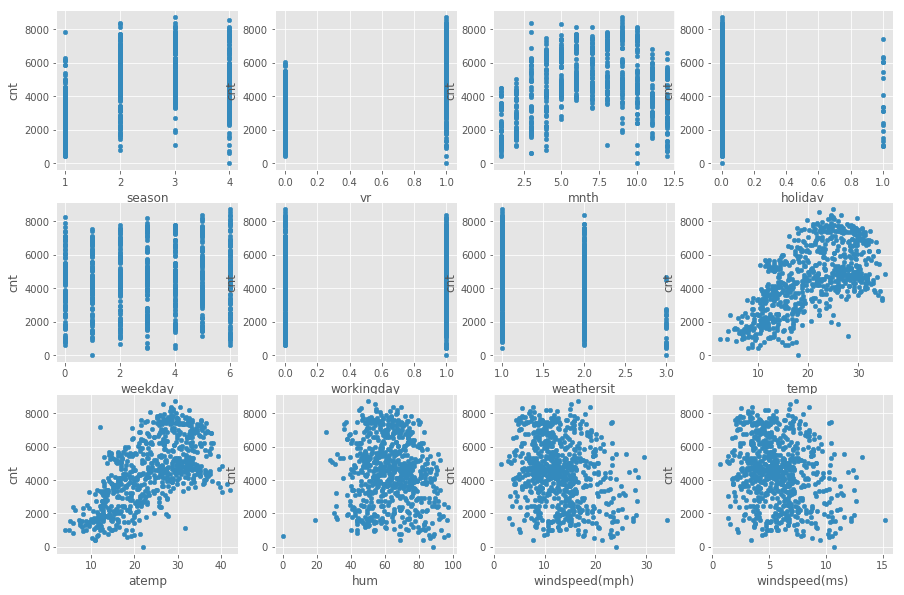

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

Каков характер зависимости числа прокатов от месяца? От каких признаков спрос зависит линейно? 

Напоследок посмотрим средние признаков (метод mean), чтобы оценить масштаб признаков и доли 1 у бинарных признаков.

In [41]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [42]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Признаки имеют разный масштаб, значит для дальнейшей работы нам лучше нормировать матрицу объекты-признаки.

## 2. Проблема первая - корреляции.

Постройте матрицу корреляций. Есть ли между какими-то признаки слишком высокая корреляция? 

In [43]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

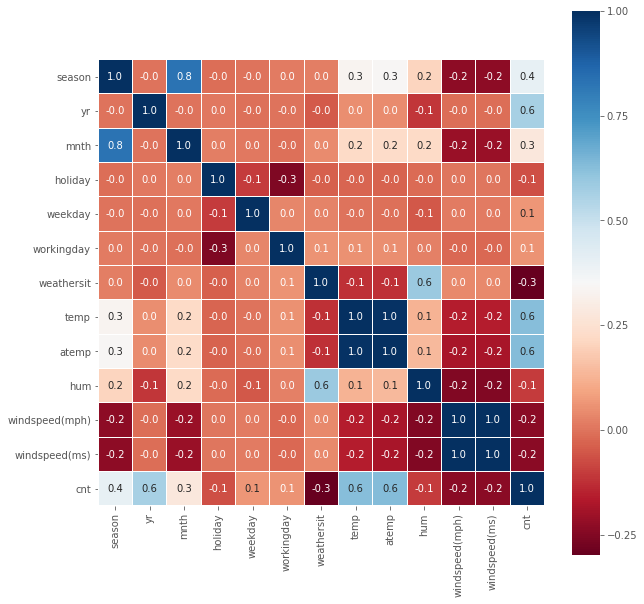

In [44]:
plt.figure(figsize=(10,10))
corr = df.corr()  # посчитали корреляции между регрессорами

# рисуем корреляционную матрицу
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Итак, в наших данных некоторые признаки дублируют друг-друга. Также много похожих признаков. Конечно, мы могли бы сразу удалить дубликаты, но давайте посмотрим, как бы происходило обучение модели, если бы мы не заметили эту проблему. 

Для начала проведем масштабирование, или стандартизацию признаков: из каждого признака вычтем его среднее и поделим на стандартное отклонение. Это можно сделать с помощью метода scale. Кроме того, нужно перемешать выборку, это потребуется для кросс-валидации.

In [45]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

df_shuffled = shuffle(df, random_state=123)       # перемешали 
X = scale(df_shuffled[df_shuffled.columns[:-1]])  # скалируем сразу всё (это не очень правильно)
y = df_shuffled["cnt"]

Давайте обучим линейную регрессию на наших данных и посмотрим на веса признаков.

In [46]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [48]:
from sklearn.linear_model import LinearRegression  # подгрузили модель

model_1 = LinearRegression()  # объявили модель
model_1.fit(X,y)              # обучили модель 

# посмотрели на коэффициенты
result = zip(df.drop('cnt', axis=1).columns, model_1.coef_)

for obj in result:
    print('Перед', obj[0], 'коэффициент', round(obj[1],2))

Перед season коэффициент 570.87
Перед yr коэффициент 1021.97
Перед mnth коэффициент -141.3
Перед holiday коэффициент -86.76
Перед weekday коэффициент 137.23
Перед workingday коэффициент 56.39
Перед weathersit коэффициент -330.23
Перед temp коэффициент 367.49
Перед atemp коэффициент 585.54
Перед hum коэффициент -145.61
Перед windspeed(mph) коэффициент 12458401589342.44
Перед windspeed(ms) коэффициент -12458401589540.89


Мы видим, что веса при линейно-зависимых признаках по модулю значительно больше, чем при других признаках. 

Чтобы понять, почему так произошло, можно залезть в математику и понять, что при скорелированных признаках, существует бесконечное число оптимальных коэффициентов. Такую ситуацию называют _проблемой мультиколлинеарности_.

С парой `temp`-`atemp` чуть менее коррелирующих переменных такого не произошло, однако на практике всегда стоит внимательно следить за коэффициентами при похожих признаках.

__Решение__ проблемы мультиколлинеарности состоит в _регуляризации_ линейной модели. К оптимизируемому функционалу прибавляют L1 или L2 норму весов, умноженную на коэффициент регуляризации $\alpha$. В первом случае метод называется Lasso, а во втором - Ridge. 

Обучите регрессоры Ridge и Lasso с параметрами по умолчанию и убедитесь, что проблема с весами решилась.

In [49]:
from sklearn.linear_model import Lasso, Ridge  # подгружаем модели

In [ ]:
###  Lasso модель
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [ ]:
###   Ridge модель
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вспомним семинар. Поясните каким образом введение регуляризации решает проблему с весами и мультиколлинеарностью.

## 3. Проблема вторая: неинформативные признаки

В отличие от L2-регуляризации, L1 обнуляет веса при некоторых признаках. Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$ (в лекции коэффициент при регуляризаторе мог быть обозначен другой буквой).

In [50]:
alphas = np.arange(1, 500, 50)   # задали диапазон для силы регуляризатора

# матрицы для весов перед коэффициентами (число регрессоров)*(число признаков)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alph in alphas:
    rg = Ridge(alpha=alph)  # для каждого alph обучаем модель
    ls = Lasso(alpha=alph)
    rg.fit(X,y)
    ls.fit(X,y)
    coefs_ridge[i] = rg.coef_  # и запоминаем коэффициенты
    coefs_lasso[i] = ls.coef_
    i += 1

Визуализируем динамику весов при увеличении параметра регуляризации:

Text(0.5,1,'Ridge')

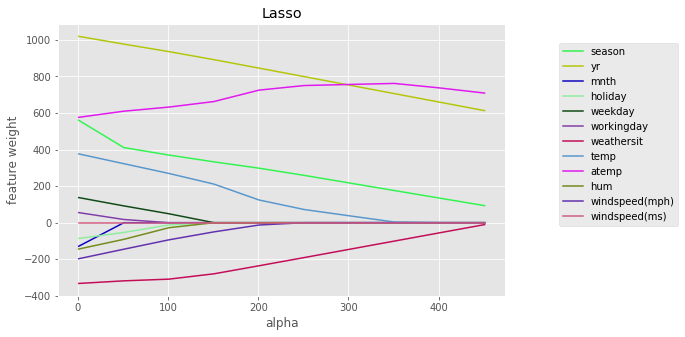

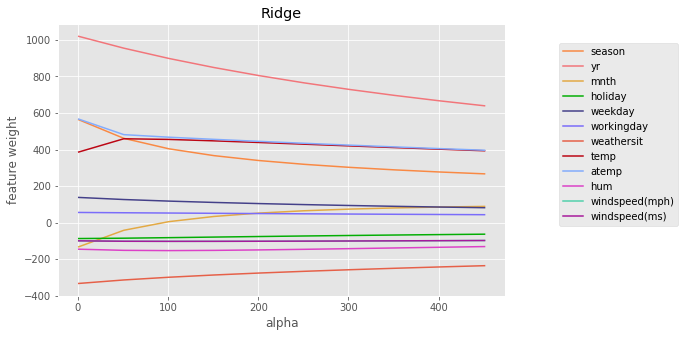

In [51]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Картинки вышли красивыми. Обратите внимание, что регуляризатор Lasso агрессивнее уменьшает веса. Подумайте с чем это связано. Если делать alpha очень большим, веса зануляются. В случае Ridge такого не происходит. Веса становятся всё ближе к нулю, но зануления не происходит. 

Из-за того, что Lasso зануляет некоторые признаки, его можно использовать для отбора самых важных признаков. Дальше будем работать именно с ним. 

Итак, мы видим, что при изменении alpha модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее alpha. 

Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть MSE (Mean Square Error).

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую (это называется holdout), то настроимся на конкретные "новые" данные, и вновь можем переобучиться. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения `alpha`, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на $K$ частей, или блоков, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку. 

Подбирать параметр alpha в `sklearn` совсем просто: для этого есть , `GridSearchCV`. Мы уже сталкивались с примером применения этой функции на семинаре. Попробуйте с помощью неё перебрать список из альф и подыскать оптимальное. Параметр cv отвечает за то на сколько часте делится выборка. Поставьте `cv=5`. Также укажите параметр `scoring = 'mean_squared_error'`. Это задаст функцию потерь, на которую будет ориентироваться `GridSearchCV` при переборе. Назовите переменную, в которой будет находиться перебор grid_cv_lasso.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# Обучите регрессор LassoCV на всех параметрах регуляризации из alpha
# Постройте график _усредненного_ по строкам MSE в зависимости от alpha. 
# Выведите выбранное alpha, а также пары "признак-коэффициент" для обученного вектора коэффициентов



In [122]:
%%time
from sklearn.model_selection import GridSearchCV

alphas = np.arange(0.5, 10, 0.01)
# Решётака для перебора параметра 
param_grid = {'alpha': alphas}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5, scoring='mean_squared_error')
grid_cv_lasso.fit(X, y)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Лучшее значение параметра: {'alpha': 2.3200000000000016}
CPU times: user 13 s, sys: 80.4 ms, total: 13.1 s
Wall time: 13.2 s


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0.5,1,'Optimal alpha')

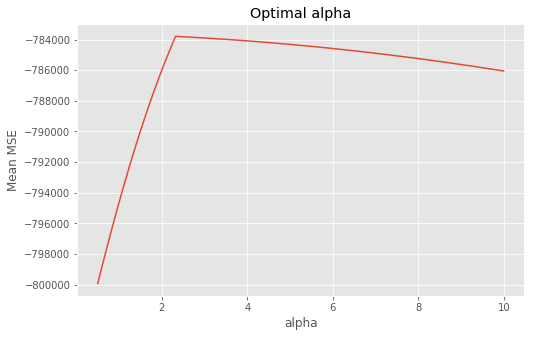

In [123]:
# если вы всё сделали верно, тут появится картинка с оптимальным альфа и динамикой ошибки. 
mean_mses = [list(item)[1] for item in grid_cv_lasso.grid_scores_]

plt.figure(figsize=(8, 5))
plt.plot(alphas, mean_mses)
plt.xlabel("alpha")
plt.ylabel("Mean MSE")
plt.title("Optimal alpha")

Выведите значения получившихся коэффициентов. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [67]:
for coef, feature in zip(lsm.coef_, np.array(df.columns[:-1])):
       print('Перед', feature, 'коэффициент', round(coef,2)) 

Перед season коэффициент 532.02
Перед yr коэффициент 1015.06
Перед mnth коэффициент -100.04
Перед holiday коэффициент -83.29
Перед weekday коэффициент 132.5
Перед workingday коэффициент 51.56
Перед weathersit коэффициент -330.56
Перед temp коэффициент 370.68
Перед atemp коэффициент 581.4
Перед hum коэффициент -140.01
Перед windspeed(mph) коэффициент -191.77
Перед windspeed(ms) коэффициент -0.0


Наконец, как принято в анализе данных, давайте проинтерпретируем результат.

Проинтерпретируйте последнюю обученую модель. У каких признаков наибольшие положительные коэфициенты? У каких наибольшие отрицательные? Логично ли утверждать, что чем больще/меньше эти признаки, тем выше/ниже спрос на велосипеды? Какие коэффициенты занулились? 

### Заключение
Итак, мы посмотрели, как можно следить за адекватностью линейной модели, как отбирать признаки и как грамотно, по возможности не настраиваясь на какую-то конкретную порцию данных, подбирать коэффициент регуляризации. 

Стоит отметить, что с помощью кросс-валидации удобно подбирать лишь небольшое число параметров (1, 2, максимум 3), потому что для каждой допустимой их комбинации нам приходится несколько раз обучать модель, а это времязатратный процесс, особенно если нужно обучаться на больших объемах данных.